### 문제 1: iris 데이터 군집분석하기

> iris 데이터의 "petal\_length"열과 "petal\_width"열을 이용해서 K-Means 알고리즘으로 군집분석하고 그래프로 시각화하세요. 각 클러스터의 중심점이 표시되어야 합니다. 군집의 수는 2개로 하세요.

#### 코드 실행 및 해설

**1. 라이브러리 임포트 및 기본 설정**

In [ ]:
# 주피터 노트북에서 그래프를 바로 확인할 수 있게 해주는 설정
%matplotlib inline
# 그래프의 해상도를 높여주는 설정
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt # 데이터 시각화 라이브러리
import seaborn as sns           # Matplotlib 기반의 고급 시각화 라이브러리
from sklearn.cluster import KMeans # K-Means 모델
from sklearn.metrics import silhouette_score # 실루엣 계수 계산 함수

**2. 데이터 준비**

In [ ]:
# iris 데이터셋 로드
iris = sns.load_dataset("iris")
# 분석에 사용할 'petal_length', 'petal_width' 특성 선택
X = iris.loc[:, ["petal_length", "petal_width"]]

**3. K-Means 모델 생성 및 학습**

KMeans(init='random', n_clusters=2)

**4. 군집 레이블 예측**

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

**5. 군집 중심점 및 실루엣 계수 확인**

군집 중심점 좌표:
 [[1.49215686 0.2627451 ]
 [4.92525253 1.68181818]]

실루엣 계수: 0.7653904101258123


- 실루엣 계수가 약 0.765로 1에 가까워, 두 군집이 비교적 잘 분리되었음을 알 수 있음.

**6. 군집화 결과 시각화**

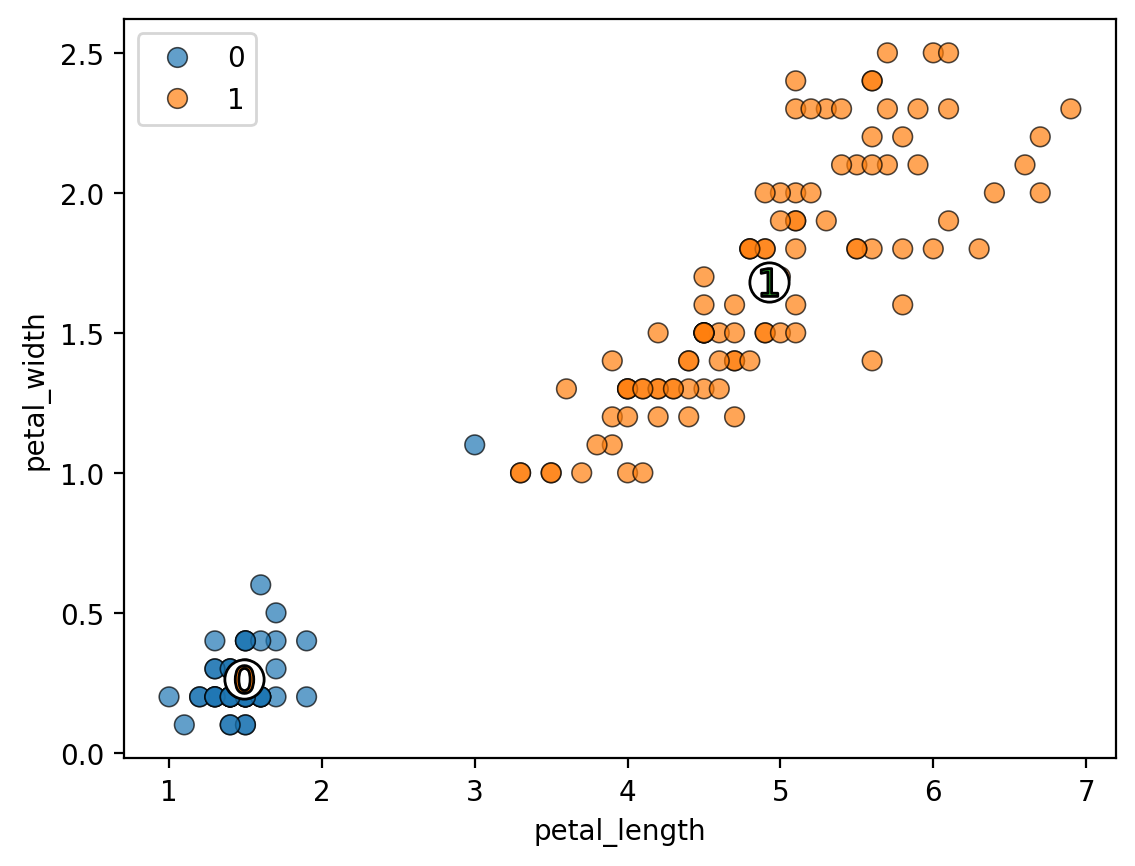

- **그래프 분석**: `petal_length`와 `petal_width`를 기준으로 데이터가 2개의 뚜렷한 그룹으로 나뉘었음을 보여줌. 각 그룹의 중심에 표시된 흰색 원은 해당 그룹의 특징을 요약하는 센트로이드임.

-----

### 문제 2: 최적의 군집 수 찾기 (실루엣 계수 활용)

> 다음 데이터를 이용해서 실루엣 계수를 출력하고 가장 높은 실루엣 계수를 출력하는 군집의 개수로 군집분석 후 산점도 그래프를 이용해서 시각화하세요.

#### 코드 실행 및 해설

**1. 샘플 데이터 생성**

In [ ]:
import numpy as np
np.random.seed(0) # 결과 재현을 위한 시드 설정

# -10 근처에 분포하는 10개의 데이터 생성
group0 = np.random.normal(-10, 2, (10,2))
# 10 근처에 분포하는 10개의 데이터 생성
group1 = np.random.normal(10, 2, (10,2))
# 0 근처에 넓게 분포하는 100개의 데이터 생성
group2 = np.random.normal(0, 5, (100,2))

# 세 그룹의 데이터를 하나로 합침
data = np.r_[group0, group1, group2]

**2. 최적의 K 찾기 (실루엣 계수 계산)**

In [ ]:
# 확인할 군집 개수(K)의 범위 설정
range_n_clusters = [2, 3, 4, 5, 6, 7]



클러스터 수: 2, 실루엣 계수: 0.3374
클러스터 수: 3, 실루엣 계수: 0.3519
클러스터 수: 4, 실루엣 계수: 0.4001
클러스터 수: 5, 실루엣 계수: 0.3968
클러스터 수: 6, 실루엣 계수: 0.4287
클러스터 수: 7, 실루엣 계수: 0.4287


- **결과 분석**: 결과를 보면, 클러스터 수가 \*\*`6`\*\*일 때 실루엣 계수가 \*\*`약 0.431`\*\*로 가장 높음. 따라서 이 데이터에 가장 적합한 군집의 수는 6개라고 판단할 수 있음.

**3. 최종 군집분석 및 시각화**

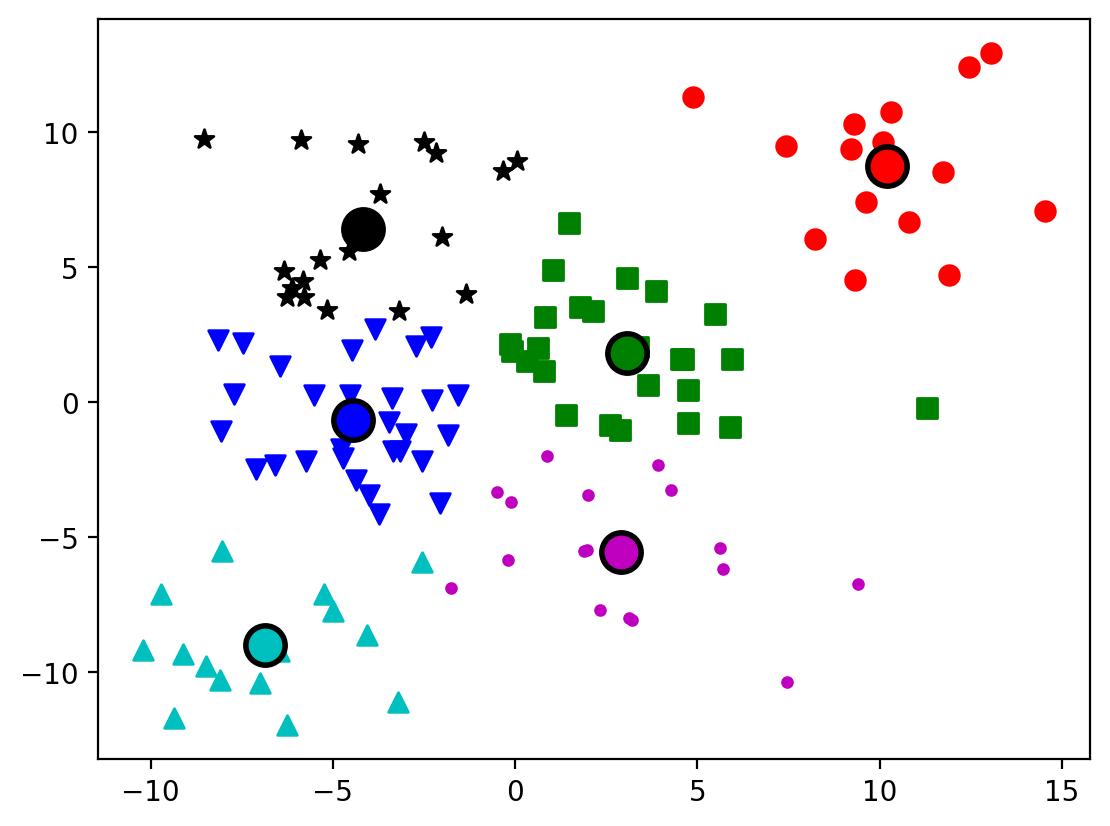

- **그래프 분석**: 그래프는 120개의 데이터 포인트가 6개의 군집으로 명확하게 나뉘었음을 보여줌. 각 군집은 고유한 색상과 마커로 구분되며, 검은색 테두리의 큰 표식은 각 군집의 중심(Centroid)을 나타냄. 실루엣 점수를 통해 데이터의 숨겨진 구조(6개 그룹)를 성공적으로 찾아냈음을 시각적으로 확인할 수 있음.

-----

## 4\. 핵심 요약 (Key Takeaways)

  - **비즈니스 관점**: \*\*`K-Means 군집분석`\*\*을 활용하면 정답 없는 고객 데이터에서 자연스러운 그룹(세그먼트)을 발견하여 **타겟 마케팅, 고객 관리 전략 수립**에 직접 활용할 수 있음.
  - **기술 관점 (모델)**: \*\*`K-Means`\*\*는 데이터 포인트와 군집 중심(Centroid) 간의 거리를 최소화하는 방향으로 반복적으로 군집을 최적화하는 직관적이고 빠른 알고리즘임.
  - **기술 관점 (평가)**: 군집 분석의 성공은 'K'값에 크게 좌우됨. \*\*`실루엣 계수`\*\*는 군집의 응집도와 분리도를 종합적으로 측정하여 **최적의 K를 선택**하도록 돕는 객관적인 지표임.